# Bismillahir Rahmaanir Raheem
# Almadadh Ya Gause RadiAllahu Ta'alah Anh - Ameen

# <font color=grey>DIabetes-related Amputation Risk Calculator (DIARC)</font>
<b>_by Zakia Salod_</b>

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import version
version()

'2.3.4'

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For graphical representations of the data
import seaborn as sns

In [ ]:
# Just to make sure the results are reproducible
np.random.seed(1234)

In [ ]:
dataset = pd.read_excel('amputation_dataset.xlsx')

In [ ]:
print(dataset['AMPUTATION'].value_counts())

0    9354
1     136
Name: AMPUTATION, dtype: int64


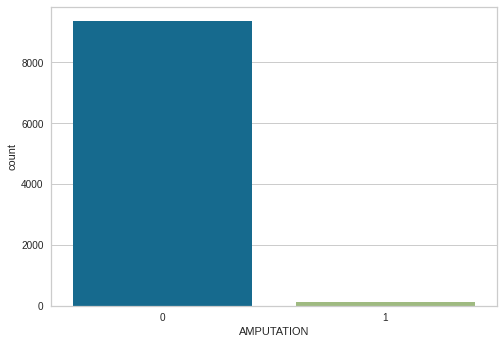

In [ ]:
ax = sns.countplot(x="AMPUTATION", data=dataset)

In [ ]:
# show the number of duplicate rows in this dataset
dataset.duplicated(keep='first').sum()

8408

In [ ]:
# remove the duplicate rows in this dataset
# only keep the first instance of the row
dataset = dataset.drop_duplicates(keep='first')

In [ ]:
print(dataset['AMPUTATION'].value_counts())

0    977
1    105
Name: AMPUTATION, dtype: int64


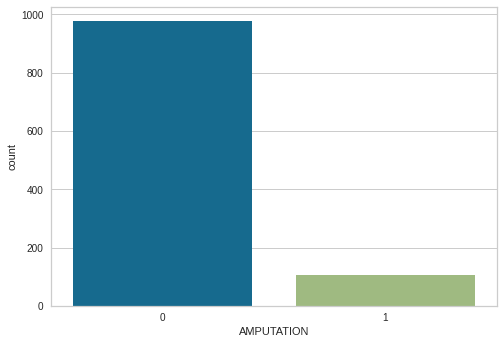

In [ ]:
ax = sns.countplot(x="AMPUTATION", data=dataset)

In [ ]:
dataset.head()

AGE GENDER    RACE   DIABETES_CLASS  AMPUTATION
0   73      M   Asian  Type 2 diabetes           0
1   79      F   Asian  Type 2 diabetes           0
2   59      M   Asian  Type 2 diabetes           0
3   76      F  Black   Type 2 diabetes           0
4   55      F  Black   Type 2 diabetes           0

In [ ]:
# Under sample the dataset to handle the imbalance
# Shuffle the Dataset.
shuffled_dataset = dataset.sample(frac=1, random_state=4)

# Put all the amputation class in a separate dataset.
amputation_dataset = shuffled_dataset.loc[shuffled_dataset['AMPUTATION'] == 1]


#Randomly select 105 observations from the non-amputation (majority class)
non_amputation_dataset = shuffled_dataset.loc[shuffled_dataset['AMPUTATION'] == 0].sample(n=105,random_state=42)

# Concatenate both dataframes again
dataset = pd.concat([amputation_dataset, non_amputation_dataset])


In [ ]:
print(dataset['AMPUTATION'].value_counts())

1    105
0    105
Name: AMPUTATION, dtype: int64


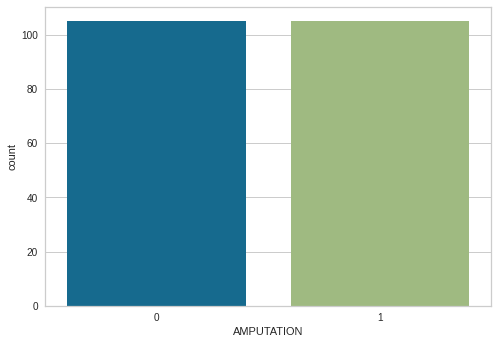

In [ ]:
ax = sns.countplot(x="AMPUTATION", data=dataset)

In [ ]:
dataset.to_excel('amputation_removed_duplicates_and_balanced.xlsx')

In [ ]:
from pycaret.classification import *

In [ ]:
clf = setup(data = dataset, target = 'AMPUTATION',  session_id = 42)

Description             Value
0                               session_id                42
1                                   Target        AMPUTATION
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (210, 5)
5                           Missing Values             False
6                         Numeric Features                 1
7                     Categorical Features                 3
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (146, 8)
12                    Transformed Test Set           (64, 8)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              9274
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
# display the dataset (X_train)
get_config('X_train')
# converts age from numeric to float
# converts gender and diabetes_class (the two binary category variables) into label encoder conversion
# so, gender_f ---> with value 1 indicating FEMALE is TRUE and value 0 indicating FEMALE is FALSE (and instead, MALE)
# diabetes_class type 1 diabetes ---> value 1 indicates diabetes type 1 and value 0 means diabetes type 2
# then, one hot encoding is applied to the race column (each race is split into separate columns, with value 1 denoting TRUE for that race)

AGE  GENDER_F  ...  RACE_White  DIABETES_CLASS_Type 1 diabetes
3557  70.0       0.0  ...         0.0                             0.0
4081  48.0       1.0  ...         0.0                             1.0
690   88.0       1.0  ...         0.0                             0.0
721   57.0       0.0  ...         0.0                             0.0
7069  52.0       0.0  ...         0.0                             0.0
...    ...       ...  ...         ...                             ...
3177  58.0       1.0  ...         0.0                             0.0
5198  54.0       1.0  ...         0.0                             0.0
6247  74.0       0.0  ...         0.0                             0.0
3750  63.0       0.0  ...         1.0                             0.0
8008  54.0       0.0  ...         1.0                             0.0

[146 rows x 8 columns]

In [ ]:
# display the dataset (y_train)
get_config('y_train')

3557    1
4081    0
690     0
721     1
7069    1
       ..
3177    0
5198    1
6247    1
3750    0
8008    1
Name: AMPUTATION, Length: 146, dtype: int64

In [ ]:
best_model = compare_models(sort = 'AUC')

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes    0.7014  0.8075  0.8518  0.6600   
lr                    Logistic Regression    0.7286  0.7778  0.8000  0.7104   
lda          Linear Discriminant Analysis    0.7424  0.7640  0.8411  0.7118   
rf               Random Forest Classifier    0.6738  0.7429  0.6500  0.6832   
ada                  Ada Boost Classifier    0.7143  0.7274  0.7429  0.7089   
lightgbm  Light Gradient Boosting Machine    0.6719  0.7272  0.7143  0.6711   
gbc          Gradient Boosting Classifier    0.6729  0.7219  0.6911  0.6804   
qda       Quadratic Discriminant Analysis    0.6662  0.6800  0.6768  0.6629   
dt               Decision Tree Classifier    0.6381  0.6651  0.6054  0.6593   
et                 Extra Trees Classifier    0.6467  0.6375  0.6357  0.6521   
knn                K Neighbors Classifier    0.5748  0.5677  0.7393  0.5445   
svm                   SVM - Linear Kernel    0.5824  0.0000  0.9429  0.5581   
ridge                    Ridge Classifier    0.7424  0.0000  0.8411  0.7118   

              F1   Kappa     MCC  TT (Sec)  
nb        0.7403  0.3954  0.4163     0.016  
lr        0.7493  0.4538  0.4626     0.288  
lda       0.7690  0.4802  0.4908     0.017  
rf        0.6566  0.3462  0.3541     0.464  
ada       0.7201  0.4263  0.4362     0.096  
lightgbm  0.6859  0.3382  0.3435     0.063  
gbc       0.6761  0.3469  0.3561     0.072  
qda       0.6508  0.3317  0.3476     0.015  
dt        0.6209  0.2757  0.2842     0.015  
et        0.6380  0.2910  0.2952     0.464  
knn       0.6211  0.1488  0.1877     0.117  
svm       0.6927  0.1538  0.2055     0.013  
ridge     0.7690  0.4802  0.4908     0.013

In [ ]:
# BLEND MODELS, ALHUM
# create models for blending
nb = create_model('nb')
bagged_nb = ensemble_model(nb, method='Bagging')
lr = create_model('lr')
bagged_lr = ensemble_model(lr, method='Bagging')
lda = create_model('lda')
bagged_lda = ensemble_model(lda, method='Bagging')

rf = create_model('rf')
bagged_rf = ensemble_model(rf, method='Bagging')
ada = create_model('ada')
bagged_ada = ensemble_model(ada, method='Bagging')


blend_specific = blend_models(estimator_list = [bagged_nb, bagged_lr, bagged_lda, bagged_rf, bagged_ada])

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6000  0.6071  0.6250  0.6250  0.6250  0.1964  0.1964
1       0.6000  0.6071  0.7500  0.6000  0.6667  0.1818  0.1890
2       0.5333  0.6429  0.7500  0.5455  0.6316  0.0367  0.0403
3       0.9333  1.0000  1.0000  0.8750  0.9333  0.8673  0.8750
4       0.8000  0.8571  0.8571  0.7500  0.8000  0.6018  0.6071
5       0.6000  0.6607  0.5714  0.5714  0.5714  0.1964  0.1964
6       0.8571  0.9592  1.0000  0.7778  0.8750  0.7143  0.7454
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7857  0.7959  0.8571  0.7500  0.8000  0.5714  0.5774
9       0.7857  0.9184  0.8571  0.7500  0.8000  0.5714  0.5774
Mean    0.7495  0.8048  0.8268  0.7245  0.7703  0.4938  0.5004
SD      0.1507  0.1552  0.1451  0.1357  0.1355  0.3084  0.3109

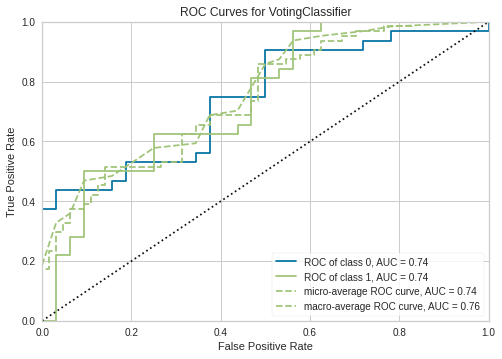

In [ ]:
# plot model
plot_model(blend_specific)

In [ ]:
# tuning
tuned_blend_specific = tune_model(blend_specific)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6667  0.6250  0.7500  0.6667  0.7059  0.3243  0.3273
1       0.6000  0.6429  0.7500  0.6000  0.6667  0.1818  0.1890
2       0.5333  0.6607  0.7500  0.5455  0.6316  0.0367  0.0403
3       0.8667  0.9821  1.0000  0.7778  0.8750  0.7368  0.7638
4       0.8000  0.8750  0.8571  0.7500  0.8000  0.6018  0.6071
5       0.6000  0.6964  0.5714  0.5714  0.5714  0.1964  0.1964
6       0.9286  0.9388  1.0000  0.8750  0.9333  0.8571  0.8660
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.7857  0.7959  0.8571  0.7500  0.8000  0.5714  0.5774
9       0.7857  0.8367  1.0000  0.7000  0.8235  0.5714  0.6325
Mean    0.7567  0.8054  0.8536  0.7236  0.7807  0.5078  0.5200
SD      0.1454  0.1359  0.1406  0.1333  0.1294  0.2987  0.3024

In [ ]:
evaluate_model(tuned_blend_specific)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
tuned_blend_specific_predictions = predict_model(tuned_blend_specific)

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0  Voting Classifier    0.6719  0.7461   0.625  0.6897  0.6557  0.3438  0.3453

In [ ]:
# finalize model for deployment
final_tuned_blend_specific = finalize_model(tuned_blend_specific)

In [ ]:
# save the model
# creates a .pkl file
save_model(tuned_blend_specific, "tuned_blend_specific_model_19112021", verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='AMPUTATION', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_s...
                                                                                                    learning_rate=1.0,
                                                                                                    n_estimators=50,
                                      

In [ ]:
# display the dataset (X_test)
get_config('X_test')

In [ ]:
# display the dataset (y_test)
get_config('y_test')

In [ ]:
dataset2 = pd.read_excel('amputation_removed_duplicates_and_balanced.xlsx')

In [ ]:
!pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(dataset2, title="Pandas Profiling Report")

In [ ]:
profile.to_file("amputation_removed_duplicates_and_balanced_report.html")